# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.correlation import plot_corr
from scipy.stats import pearsonr
from statsmodels.formula.api import ols

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = [df_train, df_test]

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df_train = pd.read_csv('df_train.csv') # load the data
df_test = pd.read_csv('df_test.csv')   # load the data

In [3]:
y = df_train[['load_shortfall_3h']]
X = df_train.drop(['load_shortfall_3h', 'Unnamed: 0'], axis=1)

In [4]:
X.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437


In [5]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
# look at data statistics
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [7]:
#understanding the shape of our dataset (predictiors)
print(f'the train set contain {X.shape[0]} datapoint (row), and {X.shape[1]} variables (columns)')

the train set contain 8763 datapoint (row), and 47 variables (columns)


In [8]:
# checking to see variables that are non-numeric
# since, machine learning models don't work well with object datatypes
print('Columns that need to be drop or converted into numeric', [x for x in X.select_dtypes('object')])

Columns that need to be drop or converted into numeric ['time', 'Valencia_wind_deg', 'Seville_pressure']


### Converting the time column into features

In [9]:
X[['time']].head(5)

,time
0,2015-01-01 03:00:00
1,2015-01-01 06:00:00
2,2015-01-01 09:00:00
3,2015-01-01 12:00:00
4,2015-01-01 15:00:00


In [10]:
# creating a function that can split the time column 
def convert_time(row):
    date, time = row.split(' ')
    year, month, day = date.split('-')
    hour = time.split(':')[0]
    return year, month, day, hour # we can also return a pd.Series([...]) and not use a zip function

In [11]:
# df = pd.DataFrame() # creating a new dataframe
X['year'], X['month'], X['day'], X['hour'] = zip(*X['time'].map(convert_time)) 
# splitting the time column into features

In [12]:
# we need to convert the new features to numeric and drop the old time column
cols = ['year', 'month', 'day', 'hour']
X[cols] = X[cols].apply(pd.to_numeric, errors='coerce', axis=1)
X.drop('time', axis=1, inplace=True)

In [13]:
X

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,3
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,6
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,9
3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,12
4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,...,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,2017,12,31,9
8759,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,...,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2017,12,31,12
8760,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,...,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,2017,12,31,15
8761,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,...,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,2017,12,31,18


### Convert the Valencia_wind_deg into numeric
#### this is easy considering it seems like a bad imputation

In [14]:
X.Valencia_wind_deg.sample(5)

8105     level_4
8605     level_6
5128     level_7
1886    level_10
3778     level_8
Name: Valencia_wind_deg, dtype: object

In [15]:
X['Valencia_wind_deg'] = X['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')

### Convert the Seville_pressure into numeric
#### this also follow the same manner like for Valencia_wind_deg conversion

In [16]:
X.Seville_pressure.sample(5)

1117    sp23
1143    sp16
4901    sp13
8103    sp15
3909     sp7
Name: Seville_pressure, dtype: object

In [17]:
X['Seville_pressure'] = X['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [59]:
# checking the conversion so far
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int64  
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [60]:
#checking for column with null or missing value
missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Valencia_pressure    2068
dtype: int64


### This is good, we only need to modify one column in the dataset
#### dropping won't be good since it seems like an important variable and 
#### the null are less than 25%

In [20]:
import numpy as np

In [61]:
#checking for the mean median and mode of the variable
stat = [np.mean(X.Valencia_pressure), X.Valencia_pressure.mode()[0], X.Valencia_pressure.median()]
stat = np.around(stat, 1)
print(f'Mean: {stat[0]}, Mode: {stat[1]}, Median: {stat[2]}')

Mean: 1012.1, Mode: 1018.0, Median: 1015.0


In [22]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [23]:
X_valid

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
6878,5.000000,2,0.0,1.000000,82.666667,60.333333,26.666667,1.333333,50.000000,134.666667,...,289.616667,289.816667,291.816667,288.816667,289.043333,286.483333,2017,5,10,9
3784,2.000000,3,0.0,6.000000,40.666667,41.666667,63.333333,3.666667,20.000000,93.333333,...,288.036667,289.150000,289.150000,298.483333,293.003333,292.416667,2016,4,18,15
1261,1.333333,10,0.3,1.000000,35.000000,43.000000,57.000000,1.000000,18.666667,249.333333,...,288.833333,294.189333,288.833333,294.172667,288.747667,288.747667,2015,6,8,6
4761,3.000000,6,0.0,1.333333,31.000000,24.000000,0.000000,1.333333,0.000000,38.666667,...,297.290000,295.930000,298.520000,306.383333,305.786667,304.416667,2016,8,18,18
7080,6.000000,3,0.2,4.666667,34.333333,38.000000,75.000000,2.000000,0.000000,316.666667,...,286.533333,295.150000,287.816667,299.150000,295.523333,291.150000,2017,6,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,6.000000,3,0.0,1.333333,73.000000,37.000000,66.000000,1.000000,32.000000,23.333333,...,291.500000,294.816667,293.150000,294.483333,301.673333,301.483333,2017,7,6,0
7428,2.333333,2,0.0,2.333333,58.666667,32.000000,0.000000,1.666667,0.000000,116.000000,...,293.993333,294.150000,295.483333,296.150000,300.483333,300.483333,2017,7,18,3
5980,4.333333,10,0.0,2.666667,24.000000,47.333333,25.000000,1.666667,0.000000,96.666667,...,273.283333,269.816667,275.483333,279.150000,271.293333,271.150000,2017,1,18,3
4731,4.666667,6,0.0,0.333333,57.333333,33.333333,36.000000,0.000000,0.000000,271.666667,...,296.576667,289.446667,299.080000,298.441667,298.936667,298.383333,2016,8,15,0


#### Since all metric seems close range, it should be okay to use the median
##### and partially because it more rombust than others

In [24]:
#Though can be done manually using SimpleImputer from sklearn is more easy and efficent
my_imputer = SimpleImputer(strategy='median')
X_train_mod1 = pd.DataFrame(my_imputer.fit_transform(X_train))
X_valid_mod1 = pd.DataFrame(my_imputer.transform(X_valid))
X_train_mod1.columns = X_train.columns
X_valid_mod1.columns = X_valid.columns

In [63]:
#checking for column with null or missing value AGAIN
missing_val_count_by_column = (X_train_mod1.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [26]:
X_train_mod1.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,...,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,2.421731,5.269187,0.137832,2.575440,62.566762,57.457846,43.650499,1.846457,13.669330,158.663005,...,286.467015,288.463318,288.002119,291.627658,288.426640,287.218759,2016.003709,6.527104,15.747789,10.491441
std,1.844745,2.882169,0.380897,2.319030,22.635425,24.408888,32.571793,1.694181,24.156530,102.509729,...,6.862272,6.111728,7.137773,8.196788,9.369193,9.224166,0.814505,3.445877,8.783521,6.879950
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,2015.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,44.000000,36.333333,10.000000,0.666667,0.000000,73.333333,...,281.430000,284.150000,282.816667,285.701763,281.420734,280.347500,2015.000000,4.000000,8.000000,3.000000
50%,2.000000,5.000000,0.000000,1.666667,65.500000,58.000000,45.000000,1.000000,0.000000,146.666667,...,286.213333,288.150000,287.710500,290.816667,287.020000,286.072833,2016.000000,7.000000,16.000000,10.500000
75%,3.333333,8.000000,0.100000,3.666667,82.000000,79.000000,75.000000,2.666667,20.000000,235.000000,...,291.100000,292.995583,292.483333,297.150000,295.243333,293.893333,2017.000000,10.000000,23.000000,15.000000
max,13.000000,10.000000,3.000000,37.666667,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,2017.000000,12.000000,31.000000,21.000000


In [27]:
X_train_mod1.skew(numeric_only=True).sort_values(ascending=False)

Valencia_snow_3h        56.611084
Barcelona_pressure      55.496298
Bilbao_snow_3h          23.425273
Seville_rain_3h         19.397124
Barcelona_rain_3h       12.991707
Barcelona_rain_1h        8.899936
Seville_rain_1h          7.904935
Madrid_rain_1h           7.166782
Bilbao_rain_1h           5.193318
Valencia_wind_speed      2.507345
Seville_clouds_all       1.808669
Bilbao_wind_speed        1.715505
Madrid_wind_speed        1.439943
Madrid_clouds_all        1.248219
Seville_wind_speed       1.169470
Barcelona_wind_speed     1.035185
Bilbao_temp_max          0.395557
Madrid_temp              0.306321
Madrid_temp_max          0.301541
Bilbao_temp              0.295633
Barcelona_temp_max       0.277163
Madrid_temp_min          0.275031
Seville_temp_min         0.260469
Bilbao_wind_deg          0.227115
Bilbao_temp_min          0.197891
Seville_temp             0.159964
Barcelona_temp           0.127933
Valencia_wind_deg        0.095503
Valencia_temp_max        0.089096
Valencia_temp_

In [28]:
kurtosis_df = X_train_mod1.kurtosis(numeric_only=True).sort_values(ascending=False)
kurtosis_df[kurtosis_df > 3]

Barcelona_pressure      3493.269446
Valencia_snow_3h        3270.752006
Bilbao_snow_3h           653.296269
Seville_rain_3h          414.826600
Barcelona_rain_3h        197.629534
Barcelona_rain_1h        106.435821
Seville_rain_1h           89.484284
Madrid_rain_1h            78.644955
Bilbao_rain_1h            32.281785
Valencia_wind_speed       14.819858
Seville_weather_id        10.233709
Madrid_weather_id          8.819932
Barcelona_weather_id       5.838110
Valencia_pressure          4.309702
Bilbao_wind_speed          3.585499
dtype: float64

#### The table above show variables  that have very high outliers present
##### which we will have to watch for!

# Plot relevant feature interactions

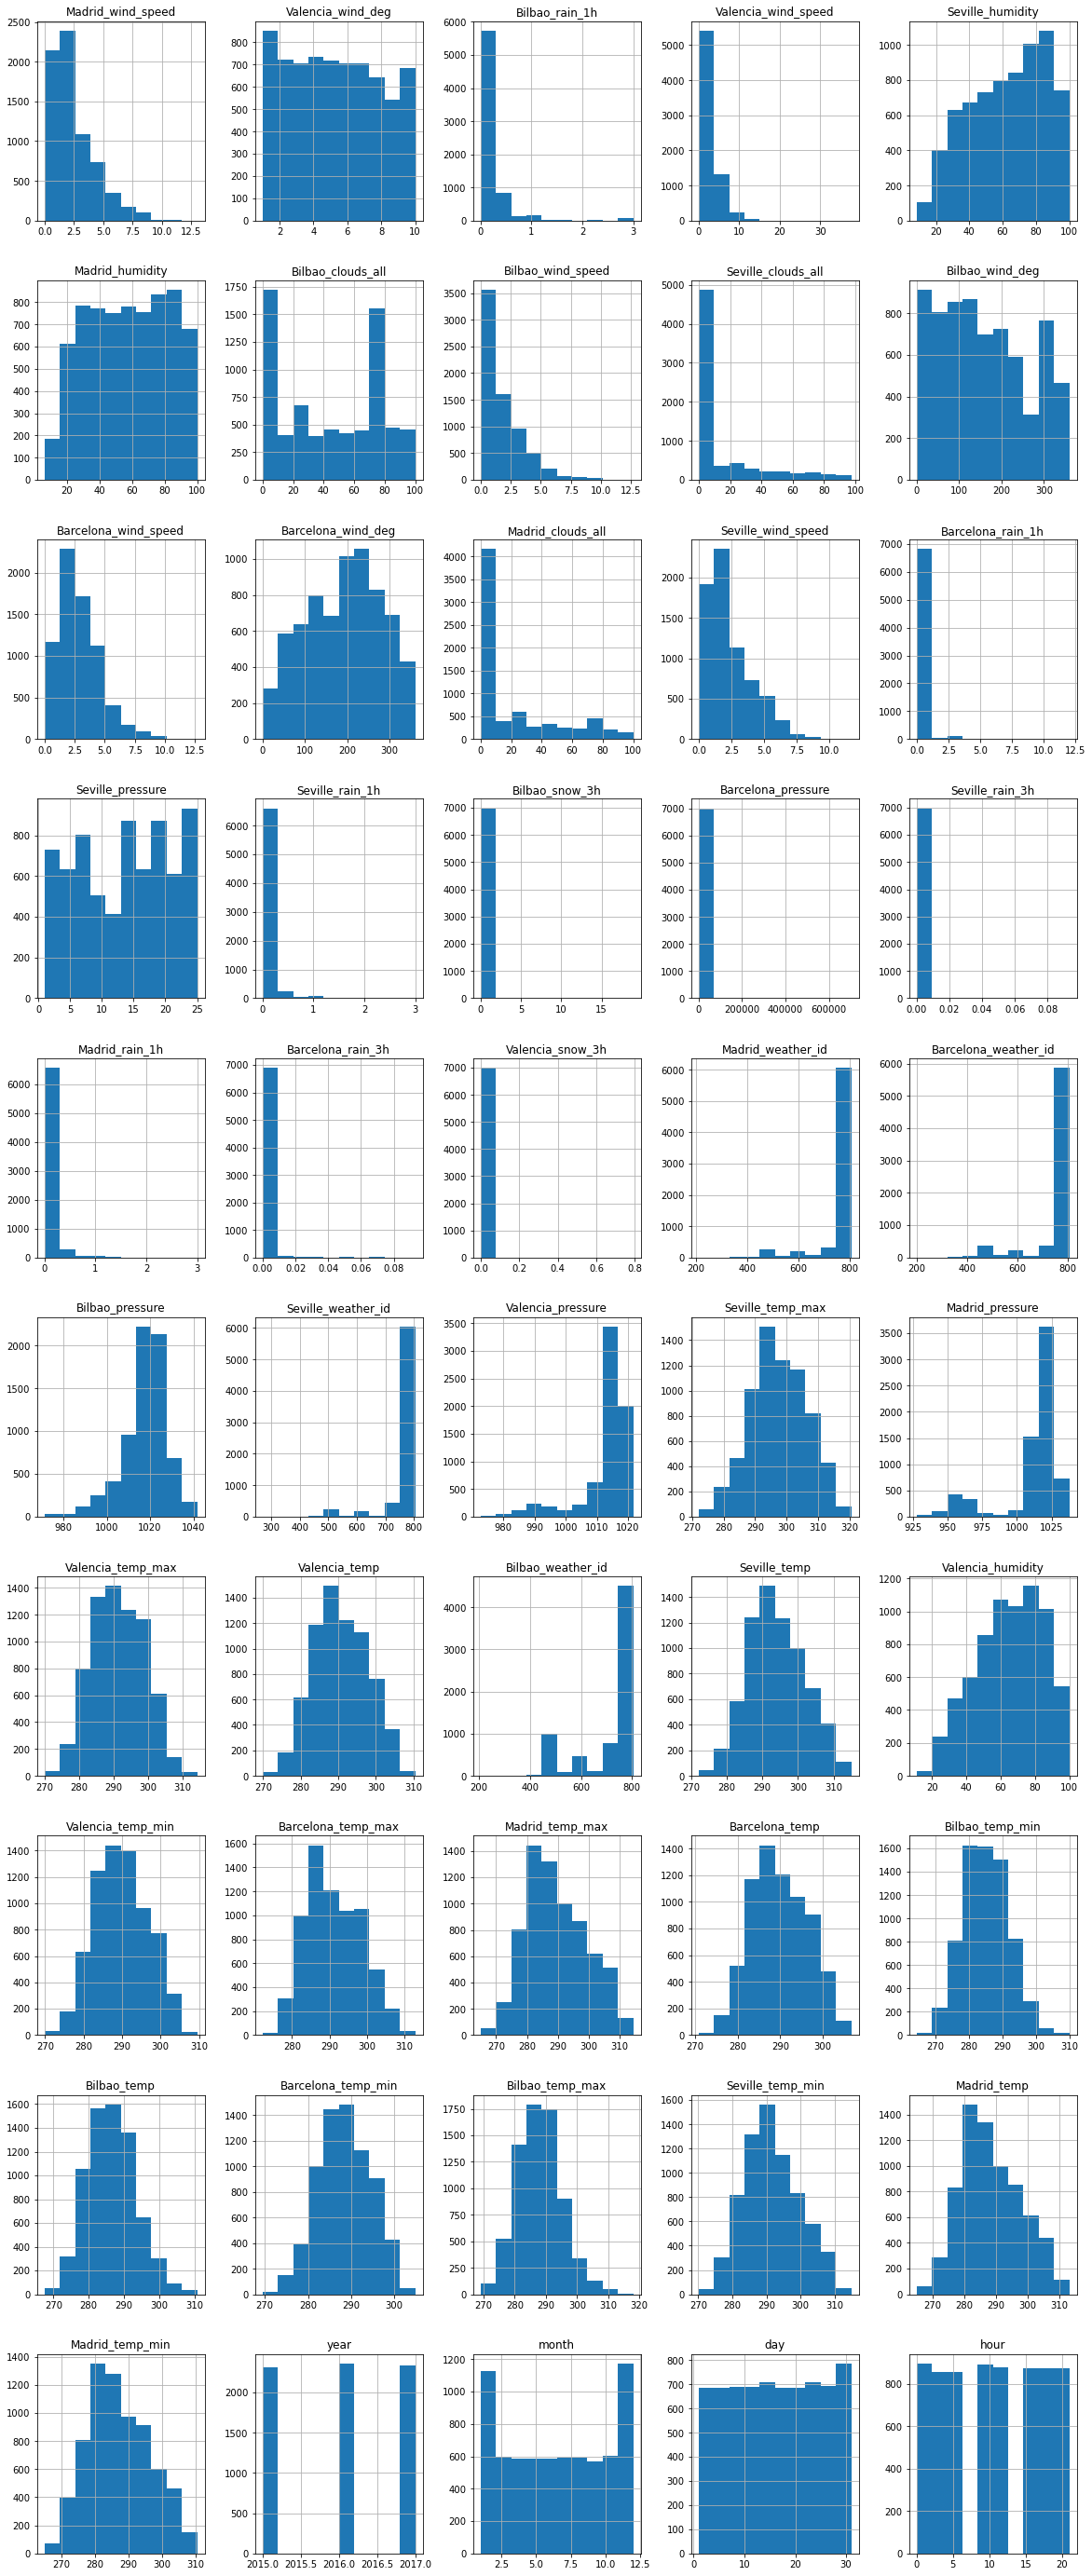

In [29]:
# Histogram plotting of the predictors
fig, ax = plt.subplots(10, 5, figsize=(20, 50))
X_train_mod1.hist(ax=ax);

In [30]:
X_train_mod1.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
Madrid_wind_speed,1.000000,0.118827,0.252452,0.523210,-0.119814,-0.137812,0.232736,0.365169,0.187828,0.263168,...,0.062560,0.091518,0.045349,0.115385,0.113415,0.102362,-0.033737,-0.233585,-0.024250,0.191664
Valencia_wind_deg,0.118827,1.000000,0.202379,0.302057,0.235212,0.252084,0.156599,0.075236,0.081490,0.159966,...,-0.281408,-0.235546,-0.291926,-0.306966,-0.334045,-0.311581,-0.052753,-0.138164,-0.017855,-0.134674
Bilbao_rain_1h,0.252452,0.202379,1.000000,0.264009,0.071394,0.112659,0.370168,0.076086,0.081738,0.276065,...,-0.181196,-0.106636,-0.218614,-0.118497,-0.135815,-0.116965,-0.205121,-0.179552,0.070462,0.051018
Valencia_wind_speed,0.523210,0.302057,0.264009,1.000000,-0.080637,-0.020478,0.205658,0.384166,0.161214,0.249072,...,-0.020408,0.001431,-0.031199,0.007743,-0.009577,-0.017218,-0.020454,-0.240446,-0.005880,0.214056
Seville_humidity,-0.119814,0.235212,0.071394,-0.080637,1.000000,0.798842,0.072130,-0.090344,0.397681,-0.089905,...,-0.611452,-0.597027,-0.591232,-0.785267,-0.719293,-0.690664,-0.035705,-0.113323,0.032904,-0.426557
Madrid_humidity,-0.137812,0.252084,0.112659,-0.020478,0.798842,1.000000,0.054226,-0.019285,0.378276,-0.069796,...,-0.636643,-0.636603,-0.614704,-0.768131,-0.803576,-0.761758,-0.078487,-0.074909,0.040348,-0.304645
Bilbao_clouds_all,0.232736,0.156599,0.370168,0.205658,0.072130,0.054226,1.000000,0.027359,0.043404,0.273183,...,-0.123026,-0.017001,-0.165004,-0.083076,-0.053559,-0.050729,-0.027565,-0.108004,0.030081,-0.031813
Bilbao_wind_speed,0.365169,0.075236,0.076086,0.384166,-0.090344,-0.019285,0.027359,1.000000,0.125706,0.418970,...,0.150622,0.028229,0.184101,0.061909,0.038412,0.029182,0.074614,-0.076979,0.000093,0.205472
Seville_clouds_all,0.187828,0.081490,0.081738,0.161214,0.397681,0.378276,0.043404,0.125706,1.000000,0.050489,...,-0.154112,-0.153525,-0.167726,-0.199111,-0.228759,-0.214737,-0.095349,-0.169176,0.016439,-0.007170
Bilbao_wind_deg,0.263168,0.159966,0.276065,0.249072,-0.089905,-0.069796,0.273183,0.418970,0.050489,1.000000,...,0.070926,0.090559,0.037564,0.067216,0.049338,0.054752,-0.103004,-0.169166,0.041147,0.116633


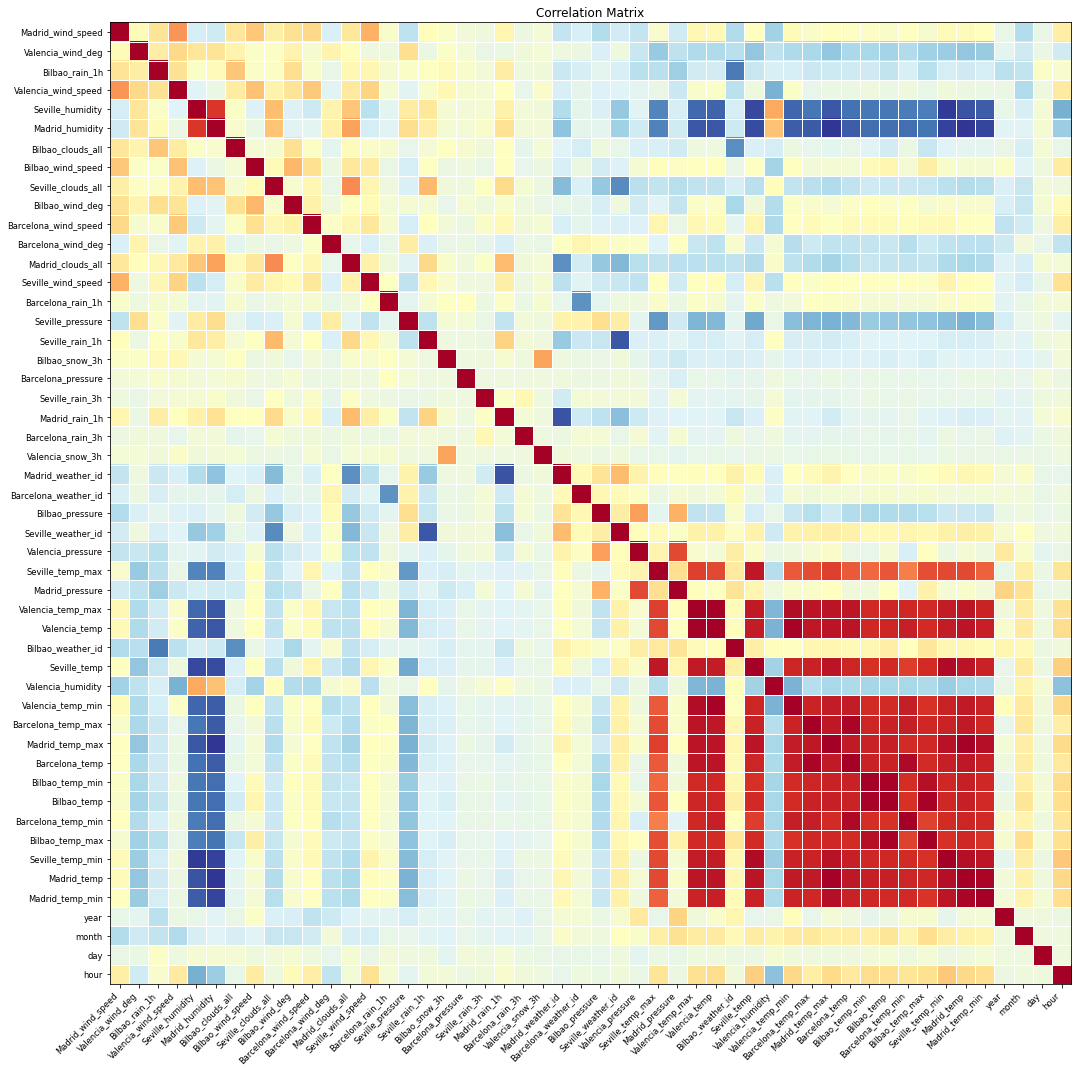

In [31]:
# illustrating the correlation in heatmap
fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(X_train_mod1.corr(), xnames = X_train_mod1.corr().columns, ax = ax);

##### It is clear from, the correllation that there are few of our predictors that will be bad for modelling considering there correllation with each other (Multicollinearity)
###### Seville_humidity and Madrid_humidity is highly correlated, this may indicate that Seville and Madrid exprience same weather codition
###### All location temperature  associated vairable are all highly correlated too, which may seems that temperature variables are similar in spain and may also be redundanct to our model; we may need to drop most of the temperature columns
###### Humidity and Temperature variables also seem correlated

We need to drop varaible across humidity and temperature and leave associate variables of highest significance respectively

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## Variable Selection
### remove features

In [32]:
y_train.head()

,load_shortfall_3h
5286,-1665.000000
1119,7984.000000
5315,14812.333333
3160,3512.333333
6791,10940.000000


In [33]:
full_train = pd.concat([X_train_mod1, y_train], axis=1, join='inner')
full_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour,load_shortfall_3h
0,5.000000,7.0,0.0,0.333333,99.000000,98.333333,33.333333,3.666667,92.0,192.333333,...,291.362000,291.778667,290.612000,287.245333,287.245333,2016.0,10.0,23.0,9.0,6715.666667
1,4.000000,2.0,3.0,1.000000,41.000000,35.000000,56.000000,1.000000,0.0,337.333333,...,289.554000,284.742490,299.944667,292.154000,292.154000,2015.0,5.0,21.0,12.0,4171.666667
2,2.000000,7.0,0.0,0.666667,75.333333,86.333333,68.000000,0.333333,36.0,64.000000,...,292.118667,285.468667,293.502000,285.693667,285.693667,2016.0,10.0,27.0,0.0,4274.666667
3,2.000000,10.0,0.0,5.333333,57.000000,63.666667,75.000000,1.000000,0.0,165.000000,...,288.127167,289.148333,289.486667,286.558000,286.118000,2016.0,1.0,31.0,15.0,5075.666667
4,2.333333,5.0,0.0,1.666667,85.666667,91.000000,0.000000,5.666667,80.0,153.333333,...,288.816667,291.483333,290.150000,282.130000,280.483333,2017.0,4.0,29.0,12.0,6620.666667


In [34]:
# Calculate correlations between predictor variables and the response variable
corrs = full_train.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [35]:
corrs

load_shortfall_3h       1.000000
Bilbao_rain_1h          0.021067
Seville_temp_min        0.019565
Madrid_wind_speed       0.018147
Valencia_pressure       0.017050
Seville_temp            0.016927
Barcelona_rain_3h       0.015364
Valencia_temp_max       0.014609
Madrid_clouds_all       0.014403
Bilbao_temp_min         0.013877
Bilbao_temp_max         0.013871
Bilbao_temp             0.013705
Valencia_temp           0.013390
month                   0.013135
Bilbao_pressure         0.012484
Barcelona_rain_1h       0.012004
Madrid_temp_max         0.011465
Madrid_temp             0.011417
Valencia_temp_min       0.010917
Barcelona_temp          0.010558
Valencia_wind_speed     0.010140
hour                    0.010060
Seville_temp_max        0.009949
Valencia_humidity       0.009749
Barcelona_temp_min      0.008873
Barcelona_temp_max      0.008210
Madrid_temp_min         0.007181
Seville_rain_1h         0.006592
Seville_wind_speed      0.004132
Barcelona_wind_speed    0.004093
Madrid_pre

In [36]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

# column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
column_titles = X_train_mod1.columns
for col in column_titles:
    p_val = round(pearsonr(X_train_mod1[col], y_train['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
corr_Pvalue = df_cp_sorted[df_cp_sorted['P_Value']<0.1]
corr_Pvalue

,Correlation_Coefficient,P_Value
Madrid_wind_speed,0.018147,0.000000
Valencia_pressure,0.017050,0.000000
Seville_temp_max,0.009949,0.000000
Madrid_pressure,0.003950,0.000000
Valencia_temp_max,0.014609,0.000000
Valencia_temp,0.013390,0.000000
Bilbao_weather_id,-0.015914,0.000000
Seville_temp,0.016927,0.000000
Valencia_temp_min,0.010917,0.000000
Barcelona_temp_max,0.008210,0.000000


In [37]:
# The dependent variable remains the same:
y_data = y_train['load_shortfall_3h']  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = X_train_mod1[X_names]

In [38]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
Madrid_wind_speed,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_deg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_rain_1h,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_speed,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_humidity,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_humidity,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_deg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
high_corr = corr.iloc[r[off_diagonal], c[off_diagonal]]
high_corr

,Seville_temp,Valencia_temp,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Madrid_temp,Valencia_temp_max,Valencia_temp_min,Barcelona_temp_max,...,Valencia_temp_max,Valencia_temp,Seville_temp,Madrid_temp_max,Barcelona_temp,Seville_temp_min,Madrid_temp_min,Madrid_temp_max,Seville_temp_min,Madrid_temp
Seville_temp_max,0.906475,0.743581,0.692503,0.736285,0.770338,0.691035,0.739234,0.770098,0.692503,0.736285,...,0.770098,0.743581,0.906475,0.770338,0.691035,0.742413,0.674577,0.770338,0.742413,0.739234
Valencia_temp_max,0.896612,0.987469,0.948850,0.919516,0.918023,0.913428,0.911885,1.000000,0.948850,0.919516,...,1.000000,0.987469,0.896612,0.918023,0.913428,0.887841,0.865291,0.918023,0.887841,0.911885
Valencia_temp_max,0.896612,0.987469,0.948850,0.919516,0.918023,0.913428,0.911885,1.000000,0.948850,0.919516,...,1.000000,0.987469,0.896612,0.918023,0.913428,0.887841,0.865291,0.918023,0.887841,0.911885
Valencia_temp_max,0.896612,0.987469,0.948850,0.919516,0.918023,0.913428,0.911885,1.000000,0.948850,0.919516,...,1.000000,0.987469,0.896612,0.918023,0.913428,0.887841,0.865291,0.918023,0.887841,0.911885
Valencia_temp_max,0.896612,0.987469,0.948850,0.919516,0.918023,0.913428,0.911885,1.000000,0.948850,0.919516,...,1.000000,0.987469,0.896612,0.918023,0.913428,0.887841,0.865291,0.918023,0.887841,0.911885
Valencia_temp_max,0.896612,0.987469,0.948850,0.919516,0.918023,0.913428,0.911885,1.000000,0.948850,0.919516,...,1.000000,0.987469,0.896612,0.918023,0.913428,0.887841,0.865291,0.918023,0.887841,0.911885
Valencia_temp_max,0.896612,0.987469,0.948850,0.919516,0.918023,0.913428,0.911885,1.000000,0.948850,0.919516,...,1.000000,0.987469,0.896612,0.918023,0.913428,0.887841,0.865291,0.918023,0.887841,0.911885
Valencia_temp,0.887591,1.000000,0.985235,0.903264,0.918127,0.916442,0.916167,0.987469,0.985235,0.903264,...,0.987469,1.000000,0.887591,0.918127,0.916442,0.892137,0.873788,0.918127,0.892137,0.916167
Valencia_temp,0.887591,1.000000,0.985235,0.903264,0.918127,0.916442,0.916167,0.987469,0.985235,0.903264,...,0.987469,1.000000,0.887591,0.918127,0.916442,0.892137,0.873788,0.918127,0.892137,0.916167
Valencia_temp,0.887591,1.000000,0.985235,0.903264,0.918127,0.916442,0.916167,0.987469,0.985235,0.903264,...,0.987469,1.000000,0.887591,0.918127,0.916442,0.892137,0.873788,0.918127,0.892137,0.916167


In [65]:
# finding out weather parameters variable that are distinct in the highly correlated dataFrame
weather_dict = {}
for x in high_corr.columns:
    finder = x.find('_')
    y = x[finder+1:]
    weather_dict[y] = weather_dict[y] + 1 if y in weather_dict else 1
weather_dict

{'temp': 25, 'temp_min': 12, 'temp_max': 21}

In [41]:
# extracting columns with better correlation using the distinct weather parameters and the correlation dataframe 
xx = [x for x in corr_Pvalue.index if x[x.find('_')+1:] in weather_dict]
corr_Pvalue.loc[xx].sort_values('Correlation_Coefficient', ascending=False)

,Correlation_Coefficient,P_Value
Seville_temp_min,0.019565,0.0
Seville_temp,0.016927,0.0
Valencia_temp_max,0.014609,0.0
Bilbao_temp_min,0.013877,0.0
Bilbao_temp_max,0.013871,0.0
Bilbao_temp,0.013705,0.0
Valencia_temp,0.013390,0.0
Madrid_temp_max,0.011465,0.0
Madrid_temp,0.011417,0.0
Valencia_temp_min,0.010917,0.0


From the table above we can depict the temp, temp_max and temp_min best correlation value, we will pick those three and drop the remaining varaible associated with this three aformentioned
Which are:
### Seville_temp_min
### Seville_temp
### Valencia_temp_max

In [42]:
# create targets and features dataset
# y_train_mod = full_train['load_shortfall_3h']
# X_train_mod2 = full_train.drop('load_shortfall_3h', axis=1)

In [43]:
# Dropping column from our dataset

usable_high_corr = ['Seville_temp_min', 'Seville_temp', 'Valencia_temp_max']
drop_coln_list = [x for x in high_corr.columns.unique() if x not in usable_high_corr]
X_train_mod2 = X_train_mod1.drop(drop_coln_list, axis=1)

In [66]:
X_train_mod2

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_pressure,Valencia_temp_max,Bilbao_weather_id,Seville_temp,Valencia_humidity,Seville_temp_min,year,month,day,hour
0,5.000000,7.0,0.0,0.333333,99.000000,98.333333,33.333333,3.666667,92.0,192.333333,...,945.666667,288.170333,802.000000,290.612000,89.000000,290.612000,2016.0,10.0,23.0,9.0
1,4.000000,2.0,3.0,1.000000,41.000000,35.000000,56.000000,1.000000,0.0,337.333333,...,964.000000,293.194667,502.000000,299.944667,42.000000,299.944667,2015.0,5.0,21.0,12.0
2,2.000000,7.0,0.0,0.666667,75.333333,86.333333,68.000000,0.333333,36.0,64.000000,...,967.000000,286.368667,803.000000,293.502000,85.666667,293.502000,2016.0,10.0,27.0,0.0
3,2.000000,10.0,0.0,5.333333,57.000000,63.666667,75.000000,1.000000,0.0,165.000000,...,1032.333333,294.176667,803.000000,290.316667,37.666667,289.486667,2016.0,1.0,31.0,15.0
4,2.333333,5.0,0.0,1.666667,85.666667,91.000000,0.000000,5.666667,80.0,153.333333,...,1013.000000,288.150000,800.000000,299.130000,62.333333,290.150000,2017.0,4.0,29.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,1.000000,1.0,0.0,0.666667,78.666667,53.000000,63.333333,0.000000,0.0,196.000000,...,1017.000000,295.083333,802.666667,297.316667,94.000000,291.816667,2016.0,7.0,1.0,6.0
7006,1.666667,4.0,0.0,0.666667,56.666667,39.000000,33.000000,0.666667,0.0,64.000000,...,1019.333333,295.150000,801.666667,296.803333,88.333333,296.150000,2017.0,9.0,14.0,0.0
7007,1.666667,3.0,0.0,1.666667,78.000000,32.000000,25.000000,0.000000,12.0,9.000000,...,1017.000000,298.816667,801.000000,298.540000,75.333333,295.150000,2016.0,8.0,31.0,0.0
7008,7.666667,8.0,0.2,10.666667,72.000000,82.000000,38.333333,4.000000,75.0,266.666667,...,1007.666667,295.716667,600.333333,291.400000,49.000000,290.150000,2016.0,2.0,13.0,15.0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

### create LineraRegressor ML model

In [44]:
# Create our new OLS formula based-upon our smaller subset
formula_str = 'load_shortfall_3h' + ' ~ ' + ' + '.join(X_train_mod2.columns);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Madrid_wind_speed + Valencia_wind_deg + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_pressure + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Madrid_pressure + Valencia_temp_max + Bilbao_weather_id + Seville_temp + Valencia_humidity + Seville_temp_min + year + month + day + hour


In [45]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=full_train)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8974
Date:                Tue, 10 May 2022   Prob (F-statistic):              0.650
Time:                        19:34:26   Log-Likelihood:                -55731.
No. Observations:                5595   AIC:                         1.115e+05
Df Residuals:                    5556   BIC:                         1.118e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7.089e+04 

In [46]:
# Function for creating RandomForest and checking MAE
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [47]:
X_valid_mod2 = X_valid_mod1.drop(drop_coln_list, axis=1)

In [48]:
print("MAE from Correlation and Significance (Drop columns with Multicollinearity)")
score_dataset(X_train_mod2, X_valid_mod2, y_train, y_valid)

MAE from Correlation and Significance (Drop columns with Multicollinearity)


C:\Users\ADETUN~1\AppData\Local\Temp/ipykernel_15296/2385471838.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


2563.0928978893335

In [49]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_mod2, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(X_valid_mod2)
print("MAE from Correlation and Significance (Drop columns with Multicollinearity values):")
print(mean_absolute_error(y_valid, preds_valid))

C:\Users\ADETUN~1\AppData\Local\Temp/ipykernel_15296/3779810443.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_mod2, y_train)


MAE from Correlation and Significance (Drop columns with Multicollinearity values):
2404.297211922419


### Converting the time column into features

In [50]:
df_test = df_test.drop(['Unnamed: 0'], axis=1)

In [51]:
# df = pd.DataFrame() # creating a new dataframe
df_test['year'], df_test['month'], df_test['day'], df_test['hour'] = zip(*df_test['time'].map(convert_time)) 
# splitting the time column into features

In [52]:
# we need to convert the new features to numeric and drop the old time column
cols = ['year', 'month', 'day', 'hour']
df_test[cols] = df_test[cols].apply(pd.to_numeric, errors='coerce', axis=1)
X_test = df_test.drop('time', axis=1)

### Convert the Valencia_wind_deg into numeric
#### this is easy considering it seems like a bad imputation

In [53]:
X_test['Valencia_wind_deg'] = X_test['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')

### Convert the Seville_pressure into numeric
#### this also follow the same manner like for Valencia_wind_deg conversion

In [54]:
X_test['Seville_pressure'] = X_test['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [55]:
X_test = X_test.drop(drop_coln_list, axis=1)

In [56]:
# Fill in the line below: preprocess test data
final_X_test = pd.DataFrame(my_imputer.fit_transform(X_test))

# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)

In [57]:
# Save test predictions to file
output = pd.DataFrame({'time': df_test.time,
                       'load_shortfall_3h': preds_test})
output.to_csv('submission.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [58]:
# discuss chosen methods logic